# Fourier analysis of SXS:BBH:0305 (GW150914-like)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import qnm_filter
import matplotlib.pyplot as pl

## Get NR waveform from SXS catalog

In [3]:
NRwaveform = qnm_filter.SXSWaveforms(filename="SXS:BBH:0305")

We focus on the $(l=2,m=2)$ harmonic.  
Interpolation ensures the waveform is evenly sampled, thus can be FFTed

In [4]:
NRwaveform.import_sxs_data(l=3, m=2, interpolate=True, delta_t=0.05) 
NRwaveform.get_remnant_data()

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


Get a list of QNMs that are potentially present in the waveform  

In [7]:
model_list=[]
for l in range(2,5):
    for m in range(-l,l+1):
        for n in range(0,2):
            if m>0:
                p='p' # p refers to prograde mode
            else:
                p='r' # r refers to retrograde mode
            model_list.extend([(l,m,n,p)])

In [8]:
freq_list = qnm_filter.Filter(chi=NRwaveform.chif, mass=NRwaveform.mf,
                              model_list=model_list).get_freq_list

Pad zeros on both sides of the waveform

In [9]:
NRwaveform.pad_data(2, 2)

## Filter and Fourier analysis

To begin with, let's consider overtones. Below, we first get the original ringdown without filter

In [10]:
modelist = []
no_filter=NRwaveform.add_filter('32',modelist)

Then, let's filter out overtones

In [11]:
modelist.extend([(2,2,0,'p')])
no_overtones=NRwaveform.add_filter('32',modelist)

We plot the waveforms together in the time domain

(1e-07, 1)

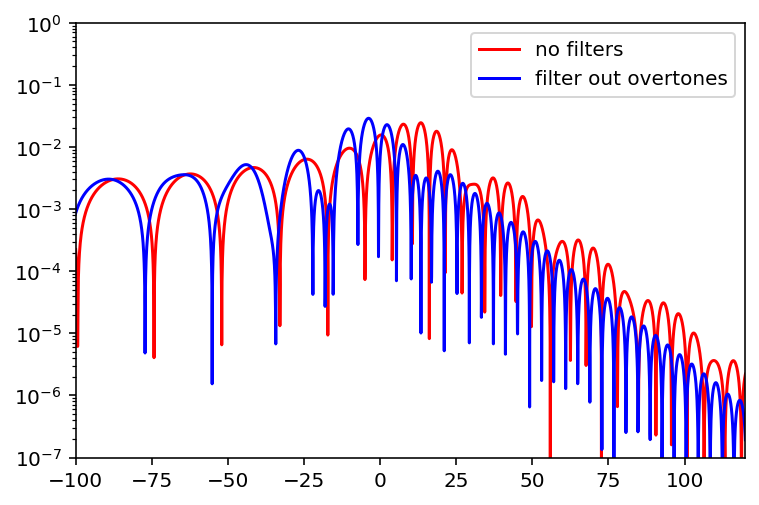

In [12]:
pl.semilogy(no_filter.time, abs(np.real(no_filter.values)),'r',label='no filters')
pl.semilogy(no_overtones.time, abs(np.real(no_overtones.values)),'b',label='filter out overtones')
pl.legend()
pl.xlim(-100,120)
pl.ylim(1e-7,1)

Aha, there are some additional oscillations. We can use Fourier analysis to idenfity their origins.   
To do this, we take the ringdown waveform in the window of $[0,80M]$

In [13]:
no_filter_trunpad=NRwaveform.trunc_pad(no_filter, 0, 80, 2, 2) # [0, 80]
no_overtones_trunpad=NRwaveform.trunc_pad(no_overtones, 0, 80, 2, 2) # [0, 80]

Plot the FFT of the truncated data. We see a huge peak of $(l=3,m=2,n=0)$, and another peak at $\omega=0$, corresponds to a constant value in the waveform (see the time-domain waveform above)

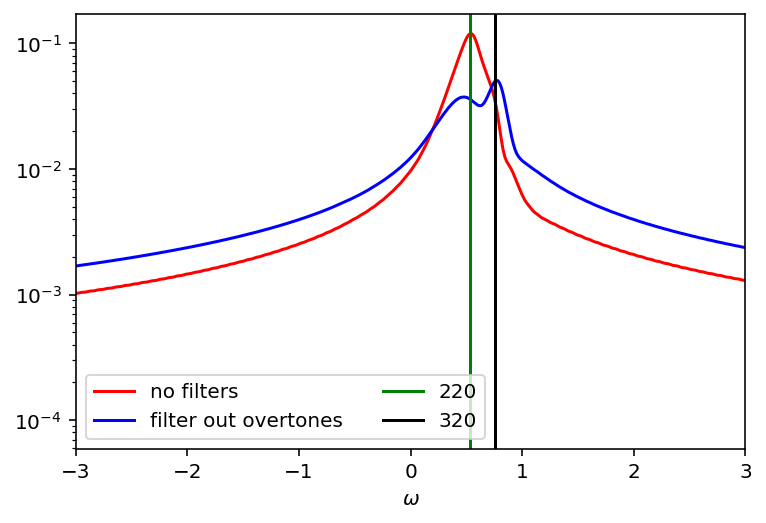

In [14]:
pl.semilogy(no_filter_trunpad.shifted_fft_freq, abs(no_filter_trunpad.shifted_fft_data),'r' ,label='no filters')
pl.semilogy(no_overtones_trunpad.shifted_fft_freq, abs(no_overtones_trunpad.shifted_fft_data),'b',label='filter out overtones')
pl.axvline(freq_list['220'].real,label='220',color='g')
pl.axvline(freq_list['320'].real,label='320',color='k')
pl.xlim(-3,3)
pl.xlabel('$\omega$')
pl.legend(ncol=2)

Now filter out $(l=3,m=2,n=0)$ and $(l=3,m=2,n=1)$

In [16]:
modelist.extend([(3,2,0,'p'), (3,2,1,'p')])
no_overtones_32n=NRwaveform.add_filter('32',modelist)
no_overtones_32n_trunpad=NRwaveform.trunc_pad(no_overtones_32n, 0, 80, 2, 2)

Notice a peak in the negative frequency band, consistent with $(l=2,m=-2,n=0)$ retrograde mode; as well as two peaks at $(l=3,m=3,n=0)$ and $(l=4,m=4,n=0)$

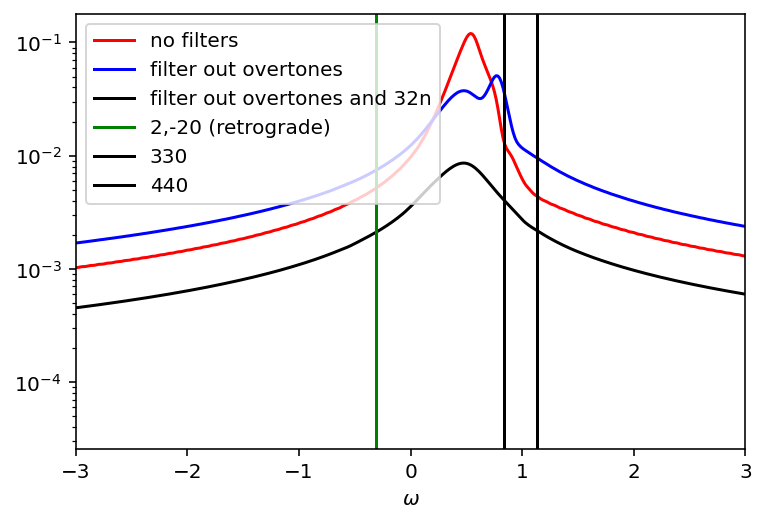

In [17]:
pl.semilogy(no_filter_trunpad.shifted_fft_freq, abs(no_filter_trunpad.shifted_fft_data),'r' ,label='no filters')
pl.semilogy(no_overtones_trunpad.shifted_fft_freq, abs(no_overtones_trunpad.shifted_fft_data),'b',label='filter out overtones')
pl.semilogy(no_overtones_32n_trunpad.shifted_fft_freq, abs(no_overtones_32n_trunpad.shifted_fft_data),'k',label='filter out overtones and 32n')
pl.axvline(freq_list['2-20'].real,label='2,-20 (retrograde)',color='g')
pl.axvline(freq_list['330'].real,label='330',color='k')
pl.axvline(freq_list['440'].real,label='440',color='k')
pl.xlim(-3,3)
pl.xlabel('$\omega$')
pl.legend(loc='upper left')

Filter out these three modes

In [19]:
modelist.extend([(2,2,1,'p'),(2,2,2,'p')])
no_overtones_32n_2m2_33_44=NRwaveform.add_filter('32',modelist)
no_overtones_32n_2m2_33_44_trunpad=NRwaveform.trunc_pad(no_overtones_32n_2m2_33_44, 0, 80, 2, 2)

Notice another peak at $(l=2,m=1,n=0)$

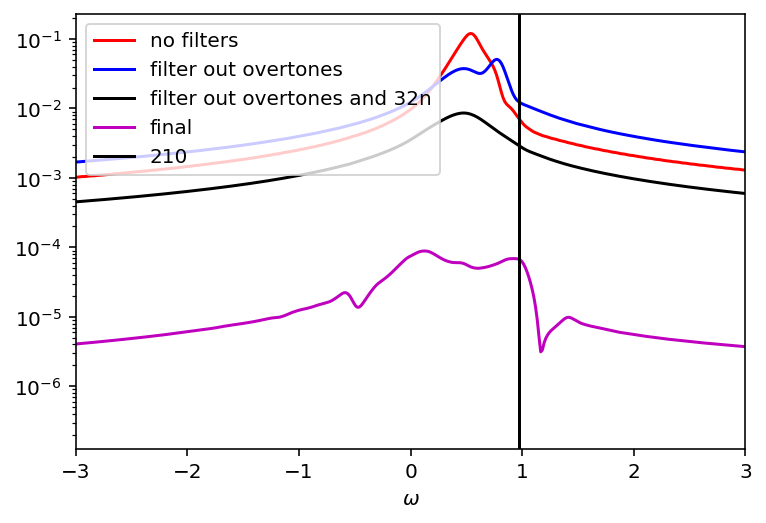

In [22]:
pl.semilogy(no_filter_trunpad.shifted_fft_freq, abs(no_filter_trunpad.shifted_fft_data),'r' ,label='no filters')
pl.semilogy(no_overtones_trunpad.shifted_fft_freq, abs(no_overtones_trunpad.shifted_fft_data),'b',label='filter out overtones')
pl.semilogy(no_overtones_32n_trunpad.shifted_fft_freq, abs(no_overtones_32n_trunpad.shifted_fft_data),'k',label='filter out overtones and 32n')
pl.semilogy(no_overtones_32n_2m2_33_44_trunpad.shifted_fft_freq, abs(no_overtones_32n_2m2_33_44_trunpad.shifted_fft_data),'m',label='final')
pl.axvline(freq_list['420'].real,label='210',color='k')
pl.xlim(-3,3)
pl.xlabel('$\omega$')
pl.legend(loc='upper left')

Filter out $(l=2,m=1,n=0)$

In [24]:
modelist.extend([(4,2,0,'p')])
final=NRwaveform.add_filter('32',modelist)
final_trunpad=NRwaveform.trunc_pad(final, 0, 80, 2, 2)

Alright, the peak is gone. Now we basically hit the level of numerical error. 

(-3.0, 3.0)

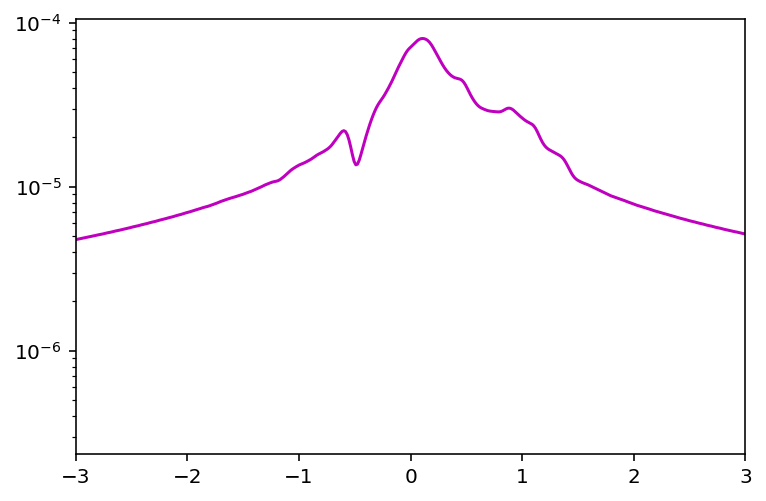

In [25]:
pl.semilogy(final_trunpad.shifted_fft_freq, abs(final_trunpad.shifted_fft_data),'m',label='final')
pl.xlim(-3,3)

Finally, let's take a look at the time-domain filtered waveform. There is a clean constant offset with some oscillations. Not sure whether they are QNMs or not.  

We are limited by the current NR precession and cannot identify more modes (if there is any)

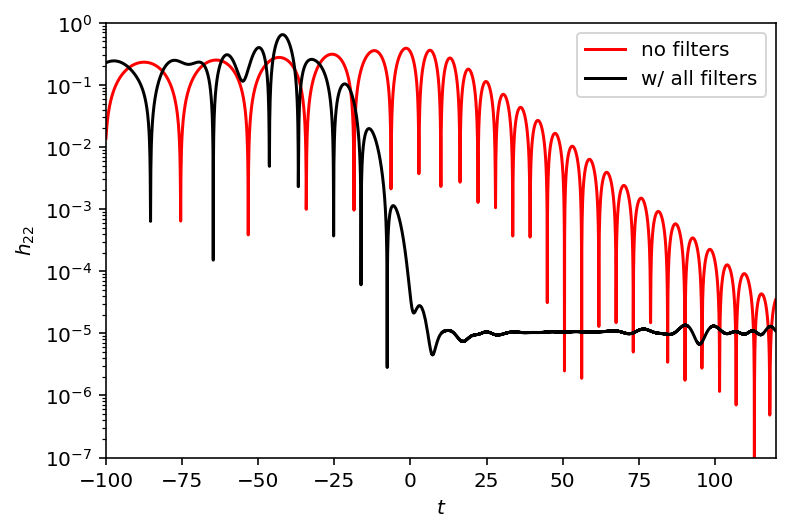

In [19]:
pl.semilogy(no_filter.time, abs(np.real(no_filter.values)),'r',label='no filters')
pl.semilogy(final.time, abs(np.real(final.values)),'k',label='w/ all filters')
pl.legend()
pl.xlim(-100,120)
pl.ylim(1e-7,1)

pl.xlabel('$t$')
pl.ylabel('$h_{22}$')
pl.savefig('h22_t_fourier.pdf',bbox_inches='tight')